## EDA on Terrorism

## Importing requires libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data and converting it into dataframe

In [6]:
df=pd.read_csv('C:/Users/sumit/OneDrive/Desktop/dataset/terrorism.csv', low_memory=False,encoding='latin1')

In [7]:
#Printing first 5 rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
#Checking rows and columns in the data
df.shape

(181691, 135)

### Getting relevant data

In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Cleaning the Data

In [10]:
#Getting the required columns from the data
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
update_data = df[['Year','Month','Day','Duration','Country','Region','city','latitude','longitude','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
update_data['Total Affected']= update_data['Killed'] + update_data['Wounded']


C:\Users\sumit\AppData\Local\Temp/ipykernel_11844/1814269181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_data['Total Affected']= update_data['Killed'] + update_data['Wounded']


In [11]:
update_data.isnull().sum()

Year                   0
Month                  0
Day                    0
Duration               0
Country                0
Region                 0
city                 434
latitude            4556
longitude           4557
success                0
suicide                0
AttackType             0
Target               636
Nationality         1559
Group                  0
Motive            131130
Weapon_type            0
Killed             10313
Wounded            16311
Summary            66129
Target_type            0
Host                 178
Total Affected     16874
dtype: int64

In [12]:
#Top 5 affected by countries
pd.DataFrame(update_data["Country"].value_counts().head())

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


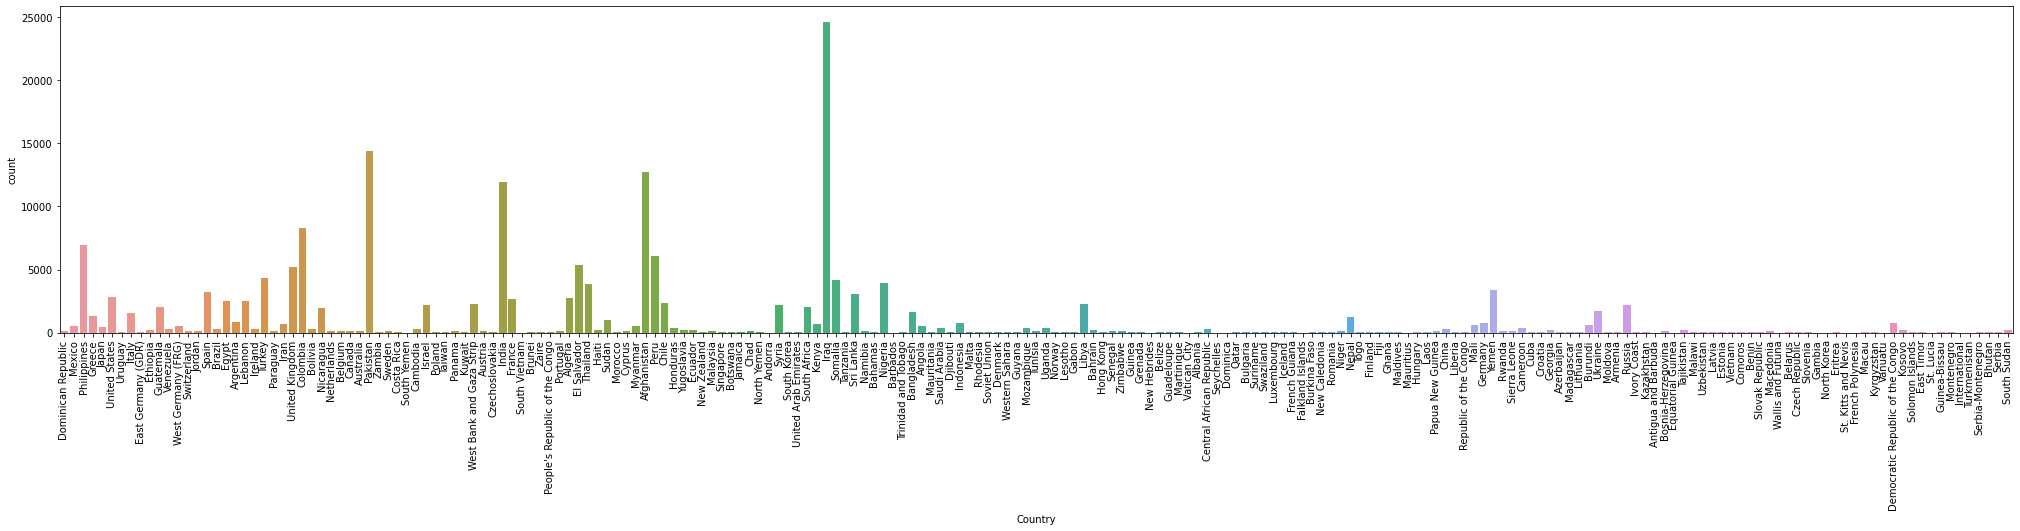

In [35]:
#All countries
pd.DataFrame(update_data['Country'].value_counts().head(10))
plt.subplots(figsize=(35,6))
sns.countplot(x= update_data["Country"],data=update_data)
plt.xticks(rotation=90)
plt.show()

C:\Users\sumit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


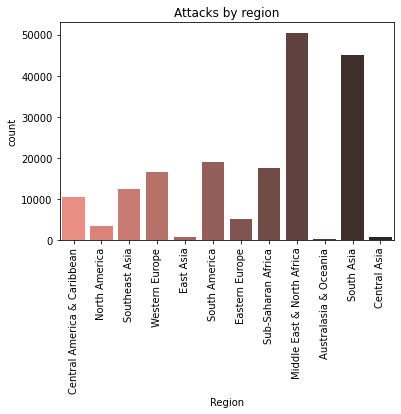

In [37]:
#Terrorism attacks be region
pd.DataFrame(update_data['Region'].value_counts())
sns.countplot('Region',data=update_data, palette='dark:salmon_r')
plt.title("Attacks by region")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Successful and Unsuccessful Attacks over the years')

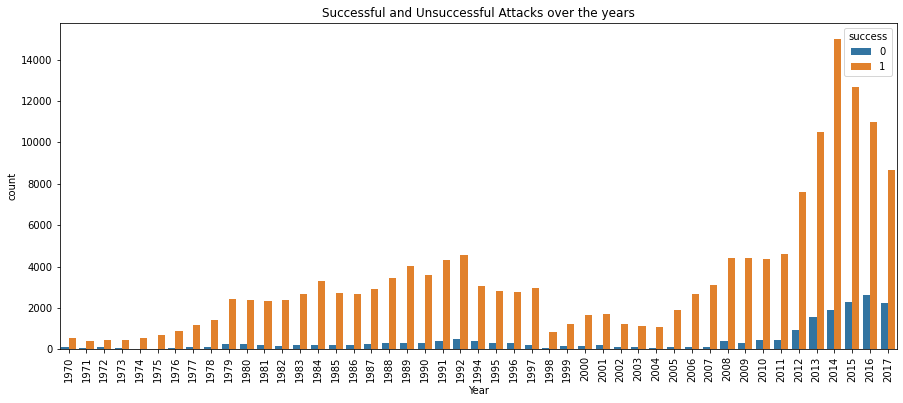

In [13]:
#Successful and unsuccessful attacks
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=update_data)
plt.xticks(rotation=90)
plt.title('Year wise successful and unsuccessful attacks')

Text(0.5, 1.0, 'Top 10 Affected countries')

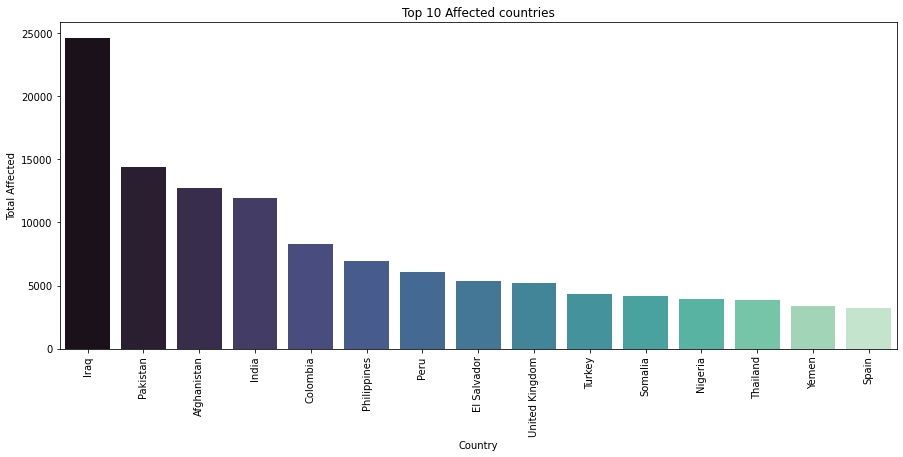

In [29]:
#Top 10 countries Affected
top_countries= update_data.Country.value_counts()[:15].reset_index()
top_countries.columns=["Country","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_countries.Country,y=top_countries["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title('Top 10 Affected countries')

Text(0.5, 1.0, 'Successful and Unsuccessful Attacks over the years')

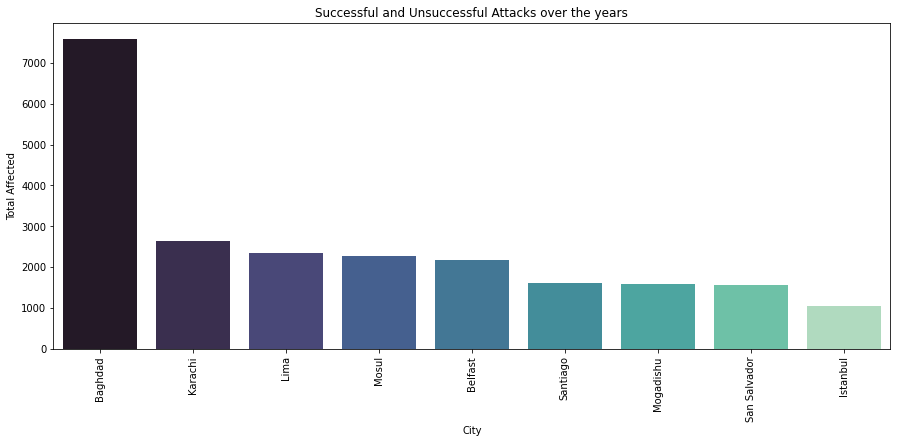

In [32]:
# Top 10 cities affected cities terrorism
top_cities= update_data.city.value_counts()[:10].drop('Unknown').reset_index()
top_cities.columns=["City","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_cities.City,y=top_cities["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title('Successful and Unsuccessful Attacks over the years')